In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# imports custom RNCRN functions that are used throughout multiple  notebooks 
import os
import sys
from pathlib import Path

module_path = str(Path(os.path.abspath('')).parent)
if module_path not in sys.path:
    sys.path.append(module_path)
    
from functions.target_systems import *
from functions.RNCRN_tools import * 
from functions.RNCRN_phase_plane import *
from functions.create_attractors_tools import * 

maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)


In [2]:
# Invokes the code for Algorithm 1 (to generate vector field)
# sets the parameter \delta
distance = 0.01

# sets the parameter \eta
magnitude = 1

# sets the parameter K (number of padding points)
number_of_padding_each_side = 20

# sets the parameter \kappa (decay scale)
decay_scale = 10

# sets the interval of the variable that is used in the parametric equation to create a line of points 
low_parametric = 0
upper_parametric = 2*np.pi
step_parametric = 0.01

# creates a line along the 3D parametric curve
t_arr = np.arange(low_parametric, upper_parametric, step_parametric)
points_arr = parametric_torus(t_arr)

# calls a function that implements Algorithm 1 
inputs, targets = draw_attractor_parametric(parametric_torus, low_parametric, upper_parametric, step_parametric, distance, magnitude, number_of_padding_each_side, old_fn=False)

# array processing for plotting purposes 
res_input = np.transpose(inputs)
res_targets = np.transpose(targets)

In [3]:
# opens data created by step_2_sim_torus
torus_traj=[]
with open('data/torus_traj_data.csv',newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in data:
        torus_traj.append([float(datapoint) for datapoint in row[0].split(',')])
        
torus_traj=np.asarray(torus_traj) 

C:\Users\ad1114\AppData\Local\Temp\ipykernel_9564\3581081540.py:25: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


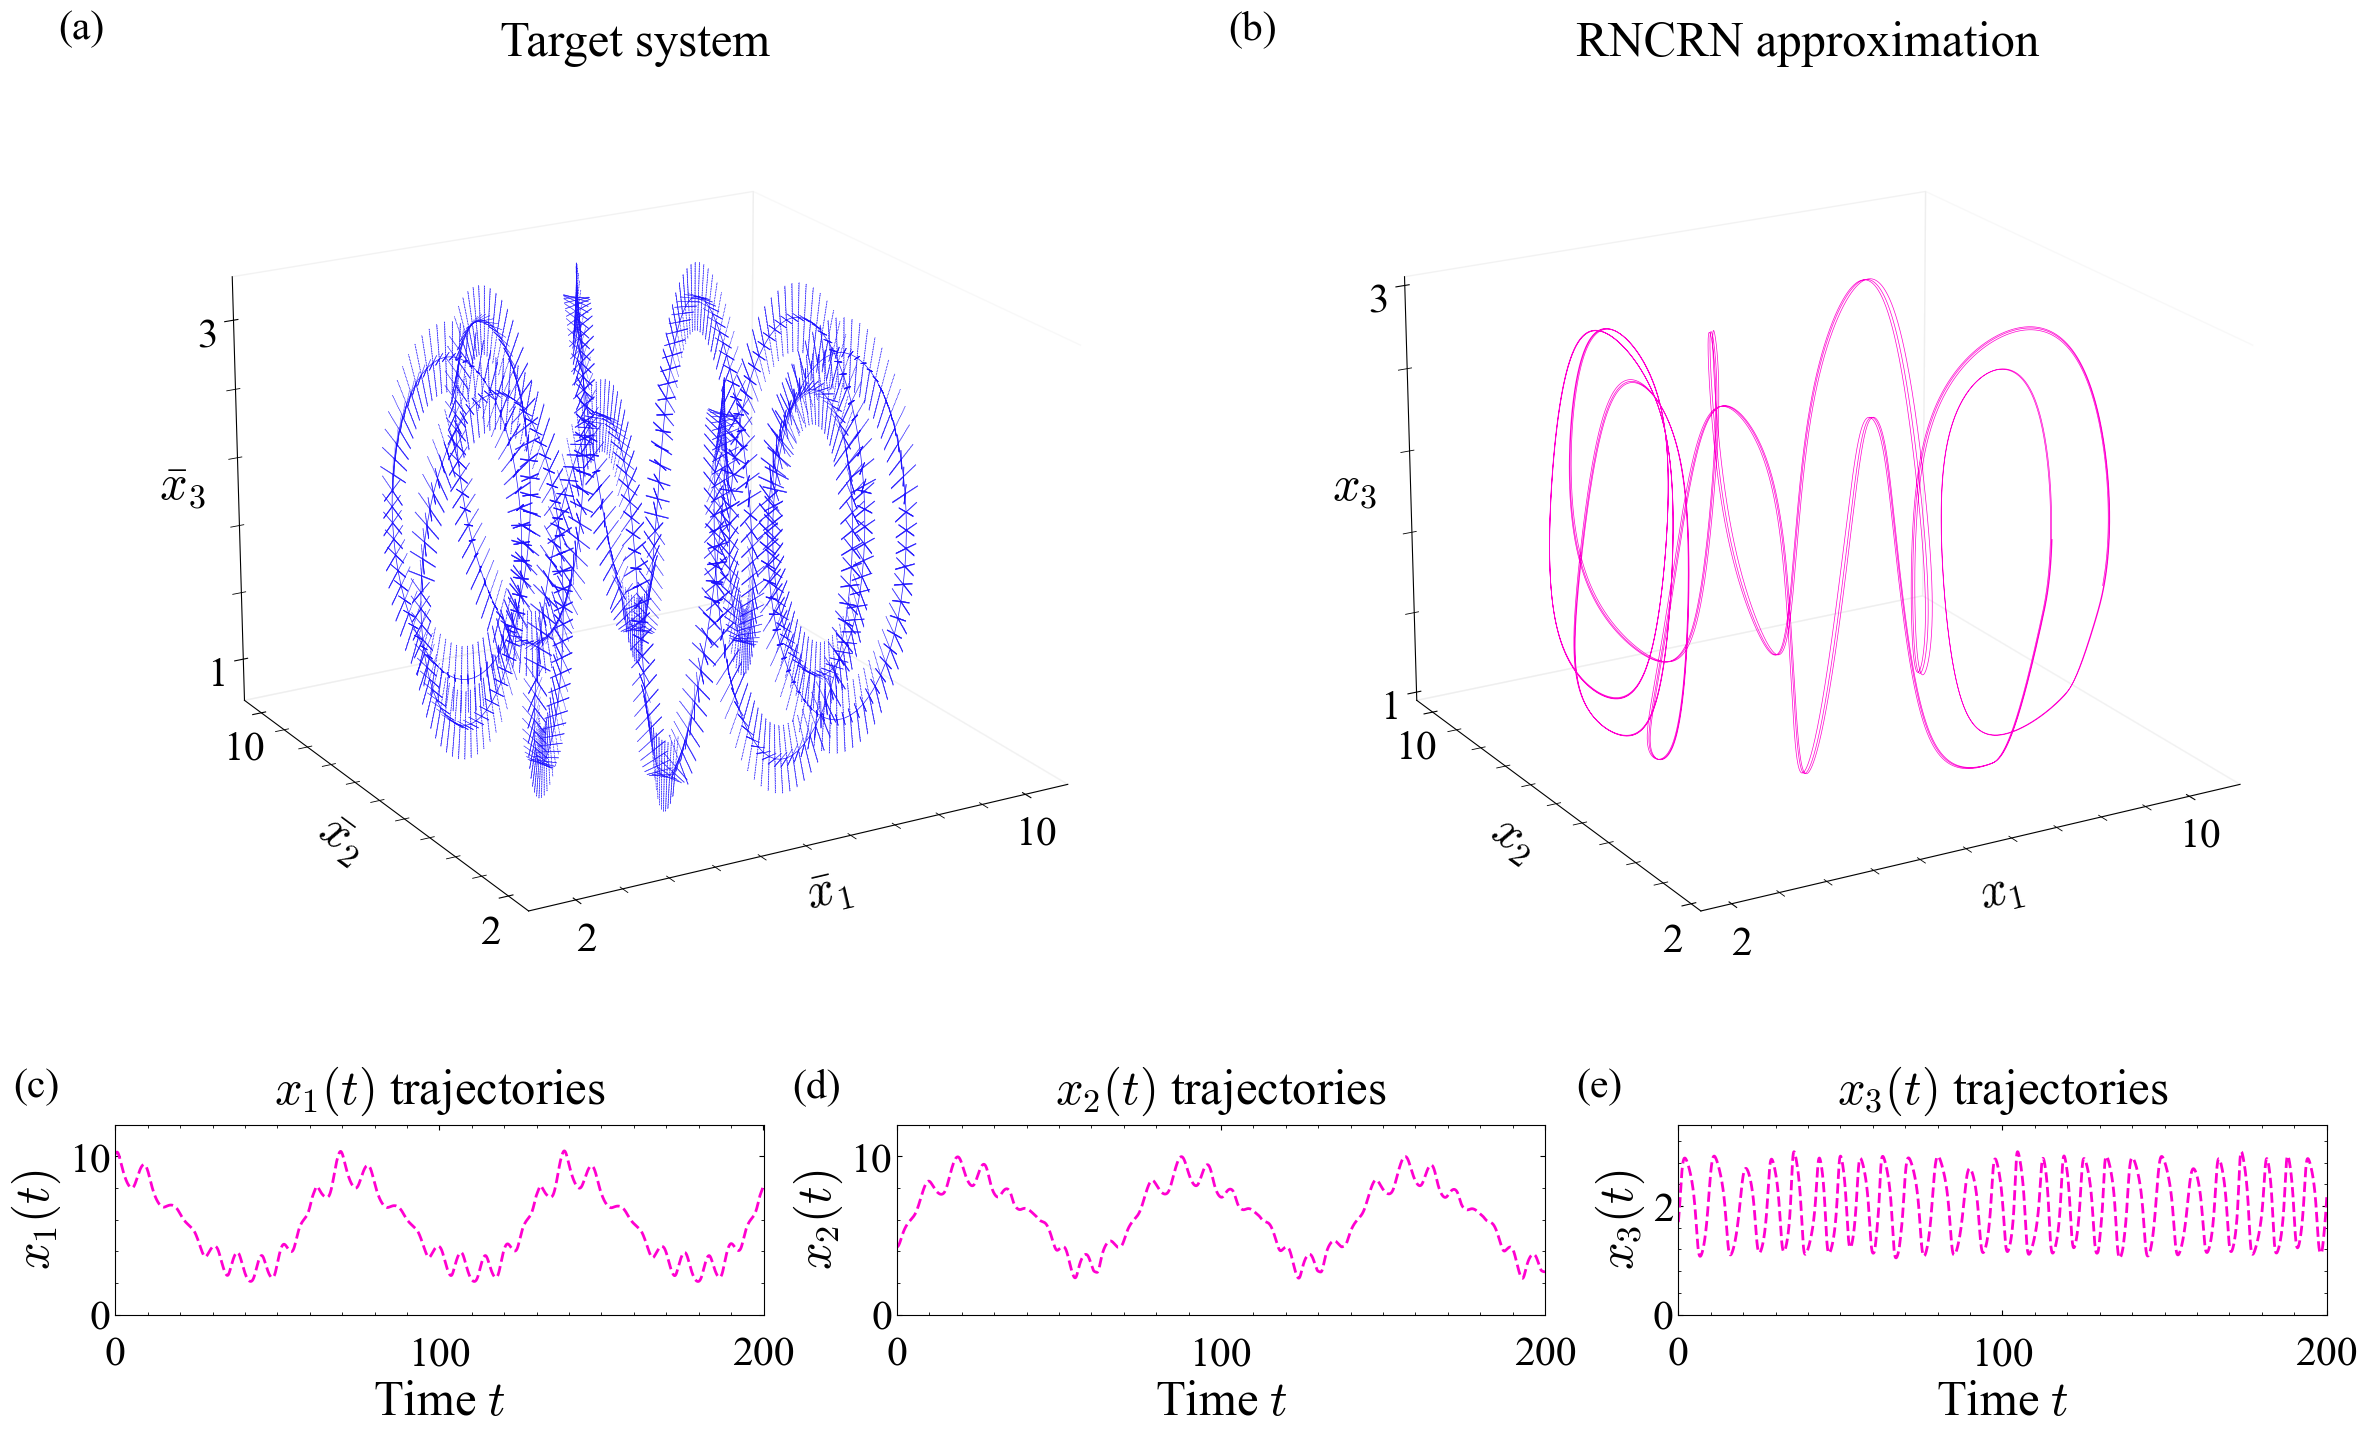

In [4]:
mpl.rcParams['lines.linewidth'] = 0.5
mpl.rcParams['font.size'] = 30
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
plt.rcParams['axes.prop_cycle'] = cycler(alpha=[1])
mpl.rcParams['figure.figsize'] = [24 , 14]
mpl.rcParams['text.usetex'] = False
mpl.rcParams['legend.frameon'] = False

ColList = ['#1F13FF','#FF00D0', '#2A2A72', '#bbbdbf']

tickfontsize=30
labelfontsize=35
titlefontsize=35
t_start = 0
t_end = 200.1
t_tick = 100
start_time_idx = int(t_start/0.01)
end_time_idx = int(t_end/0.01)
fig, axs = plt.subplot_mosaic([['(a)', '(a)', '(a)', '(b)', '(b)', '(b)'],
                               ['(c)', '(c)', '(d)', '(d)', '(e)', '(e)']], gridspec_kw={ 'height_ratios':[5,1]}, layout='constrained')

fig.tight_layout()
for label, ax in axs.items():
    trans = mtransforms.ScaledTranslation(-40/72, 14/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif', ha='right')

ss = axs['(a)'].get_subplotspec()
axs['(a)'].remove()
axs['(a)'] = fig.add_subplot(ss, projection='3d')
axs['(a)'].text2D(0.0, 1.0,'(a)', transform=axs['(a)'].transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif', ha='right')

ss = axs['(b)'].get_subplotspec()
axs['(b)'].remove()
axs['(b)'] = fig.add_subplot(ss, projection='3d')
axs['(b)'].text2D(0.0, 1.0,'(b)', transform=axs['(b)'].transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif', ha='right')

ax1 = axs['(a)']
ax1.zaxis.set_rotate_label(False)  
ax1.plot3D(points_arr[:,0], points_arr[:,1], points_arr[:,2], label='parametric curve', color=ColList[0])
ax1.quiver(res_input[:,0], res_input[:,1], res_input[:,2], res_targets[:,0], res_targets[:,1], res_targets[:,2], color=ColList[0],  length=0.01, normalize=True)
ax1.set_xticks([2,10])
ax1.set_yticks([2,10])
ax1.set_zticks([1,3])
ax1.tick_params(axis='both', which='major')
ax1.set_xlabel(r'$\bar{x}_1$', fontsize=labelfontsize )
ax1.set_ylabel(r'$\bar{x}_2$', fontsize=labelfontsize )
ax1.set_zlabel(r'$\bar{x}_3$', rotation=0, fontsize=labelfontsize )
ax1.set_title(r'Target system', loc='center', fontsize=labelfontsize)
ax1.view_init(20, -120)
ax1.set_facecolor('white') 
ax1.grid(False) 
ax1.w_xaxis.pane.fill = False
ax1.w_yaxis.pane.fill = False
ax1.w_zaxis.pane.fill = False
ax1.tick_params(bottom=True, top=True, left=True, right=True)
ax1.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.yaxis.set_minor_locator(AutoMinorLocator(10))
ax1.zaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis="x", direction="in")
ax1.tick_params(axis="x", direction="in", which="minor")
ax1.tick_params(axis="y", direction="in")
ax1.tick_params(axis="y", direction="in", which="minor")

ax2 = axs['(b)']
ax2.zaxis.set_rotate_label(False)  
ax2.plot3D(torus_traj[1,start_time_idx:end_time_idx], torus_traj[2,start_time_idx:end_time_idx], torus_traj[3,start_time_idx:end_time_idx], color=ColList[1])
ax2.set_xticks([2,10])
ax2.set_yticks([2,10])
ax2.set_zticks([1,3])
ax2.tick_params(axis='both', which='major' )
ax2.set_xlabel(r'$x_1$' , fontsize=labelfontsize)
ax2.set_ylabel(r'$x_2$', fontsize=labelfontsize )
ax2.set_zlabel(r'$x_3$', rotation=0, fontsize=labelfontsize)
ax2.set_title(r'RNCRN approximation', loc='center', fontsize=titlefontsize)
ax2.view_init(20, -120)
ax2.set_facecolor('white') 
ax2.grid(False) 
ax2.w_xaxis.pane.fill = False
ax2.w_yaxis.pane.fill = False
ax2.w_zaxis.pane.fill = False
ax2.tick_params(bottom=True, top=True, left=True, right=True)
ax2.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
ax2.xaxis.set_minor_locator(AutoMinorLocator(10))
ax2.yaxis.set_minor_locator(AutoMinorLocator(10))
ax2.zaxis.set_minor_locator(AutoMinorLocator(5))


ax3 = axs['(c)']
ax3.plot(torus_traj[0,start_time_idx:end_time_idx],torus_traj[1,start_time_idx:end_time_idx],'--' ,color=ColList[1], linewidth=2)
ax3.set_xticks(np.arange(0, t_end+t_start, t_tick))
ax3.tick_params(axis='both', which='major' )
ax3.set_xlabel(r'Time $t$', fontsize=labelfontsize )
ax3.set_ylabel(r'$x_1(t)$', fontsize=labelfontsize )
ax3.set_xlim(t_start, t_end)
ax3.set_ylim(0, 12)
ax3.set_title(r'$x_1(t)$ trajectories', loc='center', fontsize=titlefontsize,  pad=15.5)
ax3.tick_params(bottom=False, top=True, left=True, right=True)
ax3.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
ax3.xaxis.set_minor_locator(AutoMinorLocator(10))
ax3.yaxis.set_minor_locator(AutoMinorLocator(5))
ax3.tick_params(axis="x", direction="in", labelsize=tickfontsize, pad=15)
ax3.tick_params(axis="x", direction="in", which="minor")
ax3.tick_params(axis="y", direction="in", labelsize=tickfontsize)
ax3.tick_params(axis="y", direction="in", which="minor")

ax4 = axs['(d)']
ax4.plot(torus_traj[0,start_time_idx:end_time_idx], torus_traj[2,start_time_idx:end_time_idx],'--' ,color=ColList[1], linewidth=2)
ax4.set_xticks(np.arange(0, t_end+t_start, t_tick))
ax4.tick_params(axis='both', which='major' )
ax4.set_xlabel(r'Time $t$', fontsize=labelfontsize )
ax4.set_ylabel(r'$x_2(t)$', fontsize=labelfontsize )
ax4.set_xlim(t_start, t_end)
ax4.set_ylim(0, 12)
ax4.set_title(r'$x_2(t)$ trajectories', loc='center', fontsize=titlefontsize,  pad=15.5)
ax4.tick_params(bottom=False, top=True, left=True, right=True)
ax4.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
ax4.xaxis.set_minor_locator(AutoMinorLocator(10))
ax4.yaxis.set_minor_locator(AutoMinorLocator(5))
ax4.tick_params(axis="x", direction="in", labelsize=tickfontsize, pad=15)
ax4.tick_params(axis="x", direction="in", which="minor")
ax4.tick_params(axis="y", direction="in", labelsize=tickfontsize)
ax4.tick_params(axis="y", direction="in", which="minor")

ax5 = axs['(e)']
ax5.plot(torus_traj[0,start_time_idx:end_time_idx], torus_traj[3,start_time_idx:end_time_idx],'--' ,color=ColList[1], linewidth=2)
ax5.set_xticks(np.arange(0, t_end+t_start, t_tick))
ax5.tick_params(axis='both', which='major' )
ax5.set_xlabel(r'Time $t$', fontsize=labelfontsize )
ax5.set_ylabel(r'$x_3(t)$',fontsize=labelfontsize  )
ax5.set_xlim(t_start, t_end)
ax5.set_ylim(0, 3.5)
ax5.tick_params(bottom=True, top=True, left=True, right=True)
ax5.tick_params(bottom=True, top=True, left=True, right=True, which='minor')
ax5.xaxis.set_minor_locator(AutoMinorLocator(10))
ax5.yaxis.set_minor_locator(AutoMinorLocator(5))
ax5.tick_params(axis="x", direction="in", labelsize=tickfontsize, pad=15)
ax5.tick_params(axis="x", direction="in", which="minor")
ax5.tick_params(axis="y", direction="in", labelsize=tickfontsize)
ax5.tick_params(axis="y", direction="in", which="minor")
ax5.set_title(r'$x_3(t)$ trajectories', loc='center', fontsize=titlefontsize,  pad=15.5)
plt.show()
fig.savefig('figures/torus.pdf', bbox_inches='tight')

In [5]:
filename = 'models/example_torus' 
params, number_of_exec_species, number_of_chemical_perceptrons = unpack_mat_model_rncrn(filename+'.mat')

alpha_mat, omega_mat, bias_vec, beta, gamma, tau = params

print('-------beta-------')
for val in beta[:,0]:
    print(f'{val:.3f}', '\\\\')
    
print('-------alpha_mat_1-------')
for val in alpha_mat[0,:]:
    print(f'{val:.3f}', '\\\\')
    
print('-------alpha_mat_2-------')
for val in alpha_mat[1,:]:
    print(f'{val:.3f}', '\\\\')
    
print('-------alpha_mat_3-------')
for val in alpha_mat[2,:]:
    print(f'{val:.3f}', '\\\\')
    
print('-------bias_vec-------')
for val in bias_vec[:,0]:
    print(f'{val:.3f}', '\\\\')
    
print('-------omega_mat_1-------')
for val in omega_mat[:,0]:
    print(f'{val:.3f}', '\\\\')

print('-------omega_mat_2-------')
for val in omega_mat[:,1]:
    print(f'{val:.3f}', '\\\\')
    
print('-------omega_mat_3-------')
for val in omega_mat[:,2]:
    print(f'{val:.3f}', '\\\\')

print('-------gamma-------')
for val in gamma[:,0]:
    print(f'{val:.3f}', '\\\\')
    
print('-------tau-------')
for val in tau[:,0]:
    print(f'{val:.3f}', '\\\\')

-------beta-------
1.570 \\
0.408 \\
6.885 \\
-------alpha_mat_1-------
-5.227 \\
-6.586 \\
0.332 \\
-1.297 \\
1.037 \\
-0.752 \\
7.607 \\
-------alpha_mat_2-------
-0.755 \\
-5.934 \\
-3.663 \\
14.209 \\
1.077 \\
1.567 \\
2.768 \\
-------alpha_mat_3-------
30.463 \\
-19.509 \\
23.421 \\
-20.966 \\
-45.739 \\
4.597 \\
3.169 \\
-------bias_vec-------
292.047 \\
-280.508 \\
261.422 \\
-255.093 \\
262.072 \\
-198.768 \\
-139.727 \\
-------omega_mat_1-------
-39.116 \\
-17.292 \\
-3.625 \\
7.586 \\
-9.729 \\
207.473 \\
-109.965 \\
-------omega_mat_2-------
-2.949 \\
-1.592 \\
-36.064 \\
-105.612 \\
-9.325 \\
-327.333 \\
-28.268 \\
-------omega_mat_3-------
-53.870 \\
111.653 \\
-32.435 \\
145.520 \\
-67.332 \\
-308.171 \\
344.645 \\
-------gamma-------
5.488 \\
7.535 \\
3.963 \\
9.258 \\
6.007 \\
0.004 \\
5.764 \\
-------tau-------
666.189 \\
812.839 \\
496.655 \\
912.664 \\
428.803 \\
713.388 \\
4637.415 \\
